# FBI Uniform Crime Reporting Analysis | 2012

*Author: Team members name*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


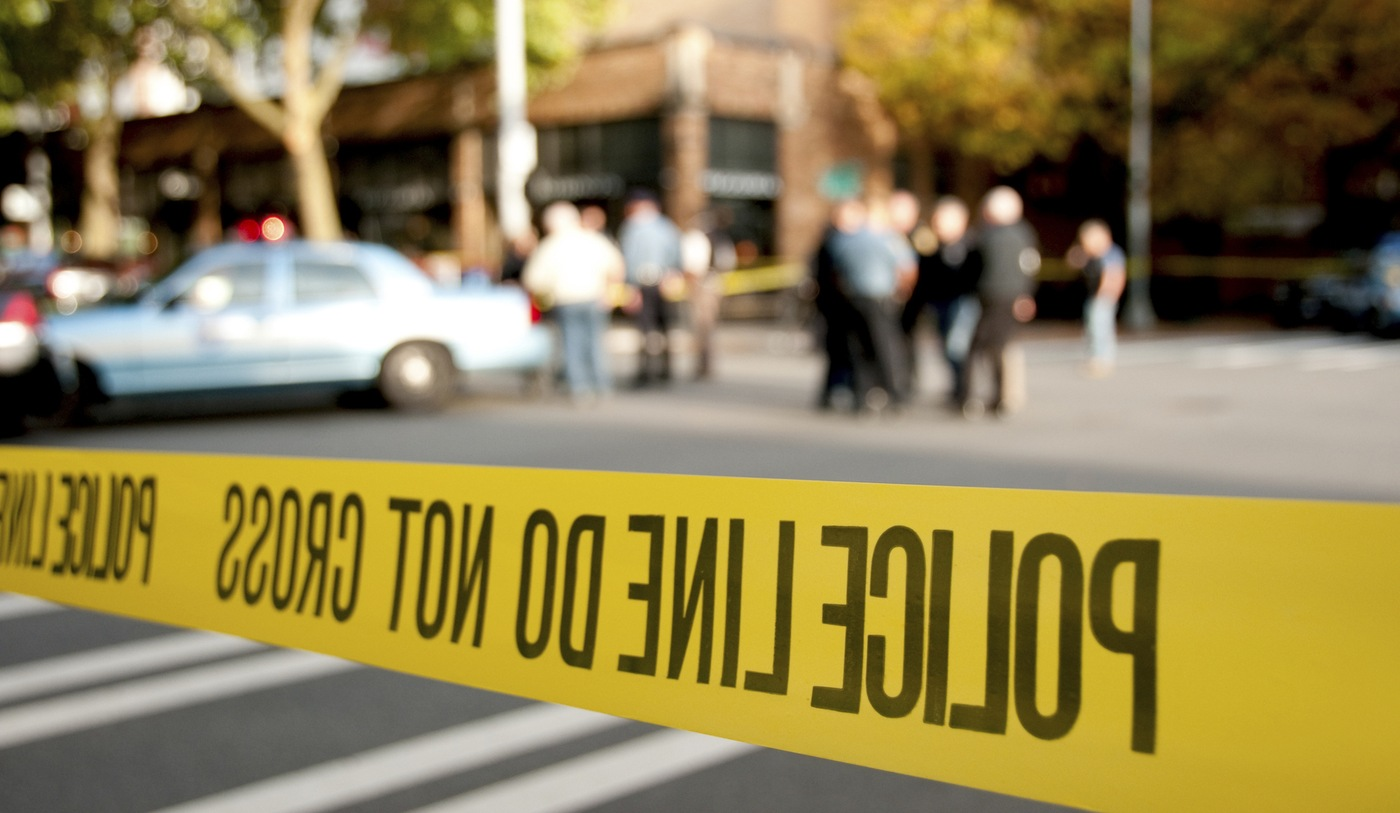

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing dataset ditectly from kaggle**
---

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


># **2- Importing libraries**
---

In [ ]:
import numpy as np
import pandas as pd

># **3- Importing dataset**
---

In [ ]:
df1  = pd.read_excel("U.S._Offense_Type_by_Agency_2012.xlsx", skiprows=3, usecols=[0,1,2,3], skipfooter=4)

df1.fillna(method='ffill', inplace=True)
#df1 = df1.drop(0, axis=0)
print(df1)

df2 = pd.read_excel("U.S._Offense_Type_by_Agency_2012.xlsx", skiprows=4, usecols=[i for i in range(4,59)], skipfooter=4)

          State               Agency Type       Agency Name  Population1
0           NaN                       NaN               NaN          NaN
1       ALABAMA                    Cities            Hoover    82332.000
2       ARIZONA                    Cities   Apache Junction    36986.000
3       ARIZONA                    Cities           Gilbert   214264.000
4       ARIZONA     Metropolitan Counties             Yuma2   214264.000
...         ...                       ...               ...          ...
5231  WISCONSIN  Nonmetropolitan Counties              Sauk     6803.000
5232  WISCONSIN  Nonmetropolitan Counties            Sawyer     6803.000
5233  WISCONSIN  Nonmetropolitan Counties             Vilas     6803.000
5234  WISCONSIN   Other Agencies - Tribal     Oneida Tribal     6803.000
5235  WISCONSIN   Other Agencies - Tribal  St. Croix Tribal     6803.000

[5236 rows x 4 columns]


In [ ]:
df1

,State,Agency Type,Agency Name,Population1
0,NaN,NaN,NaN,NaN
1,ALABAMA,Cities,Hoover,82332.000
2,ARIZONA,Cities,Apache Junction,36986.000
3,ARIZONA,Cities,Gilbert,214264.000
4,ARIZONA,Metropolitan Counties,Yuma2,214264.000
...,...,...,...,...
5231,WISCONSIN,Nonmetropolitan Counties,Sauk,6803.000
5232,WISCONSIN,Nonmetropolitan Counties,Sawyer,6803.000
5233,WISCONSIN,Nonmetropolitan Counties,Vilas,6803.000
5234,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,6803.000


In [ ]:
df_offences = pd.concat([df1,df2], axis=1)
df_offences = df_offences.drop(0, axis=0)
df_offences.head(10)

,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
1,ALABAMA,Cities,Hoover,82332.000,559.000,96.000,381.000,82.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,25.000
2,ARIZONA,Cities,Apache Junction,36986.000,1242.000,123.000,892.000,227.000,5.000,5.000,...,NaN,NaN,NaN,NaN,NaN,16.000,NaN,NaN,NaN,75.000
3,ARIZONA,Cities,Gilbert,214264.000,555.000,94.000,376.000,85.000,26.000,26.000,...,NaN,NaN,NaN,NaN,NaN,5.000,2.000,1.000,1.000,40.000
4,ARIZONA,Metropolitan Counties,Yuma2,214264.000,197.000,11.000,108.000,78.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,4.000
5,ARKANSAS,Cities,Alma,5439.000,274.000,35.000,178.000,61.000,5.000,5.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000
6,ARKANSAS,Cities,Arkadelphia,10698.000,72.000,14.000,57.000,1.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000
7,ARKANSAS,Cities,Ashdown,4680.000,22.000,1.000,13.000,8.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ARKANSAS,Cities,Atkins,3057.000,14.000,2.000,10.000,2.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000
9,ARKANSAS,Cities,Austin,2076.000,71.000,12.000,29.000,30.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,ARKANSAS,Cities,Bald Knob,2950.000,56.000,14.000,28.000,14.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000,8.000,4.000,4.000,13.000


> # **4- Basic Text Data Pre-processing**
---

In [ ]:
df_offences.columns = df_offences.columns.str.replace('\n', '')
df_offences.columns = df_offences.columns.str.replace('/', '')
df_offences.columns = df_offences.columns.str.replace('-', '')
df_offences.columns = df_offences.columns.str.replace('_', '')
df_offences.columns = df_offences.columns.str.replace(' ', '')
df_offences.columns = df_offences.columns.str.replace(',', '')

df_offences = df_offences.rename({'Population1': 'Population'}, axis = 1)

In [ ]:
#Creating 3 Different datasets based on the crimes against persons, property and society
df_person_crimes = df_offences.iloc[:,[i for i in range(0,21)]]
df_property_crimes = pd.concat([df_offences.iloc[:,[0,1,2,3]],df_offences.iloc[:,[i for i in range(21,46)]]], axis=1)
df_society_crimes = pd.concat([df_offences.iloc[:,[0,1,2,3]],df_offences.iloc[:,[i for i in range(46,59)]]], axis=1)

In [ ]:
df_society_crimes

,State,AgencyType,AgencyName,Population,DrugNarcoticOffenses,DrugNarcoticViolations,DrugEquipmentViolations,GamblingOffenses,BettingWagering,OperatingPromotingAssistingGambling,GamblingEquipmentViolations,SportsTampering,PornographyObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations
1,ALABAMA,Cities,Hoover,82332.000,308.000,152.000,156.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,25.000
2,ARIZONA,Cities,Apache Junction,36986.000,2069.000,979.000,1090.000,NaN,NaN,NaN,NaN,NaN,16.000,NaN,NaN,NaN,75.000
3,ARIZONA,Cities,Gilbert,214264.000,437.000,208.000,229.000,NaN,NaN,NaN,NaN,NaN,5.000,2.000,1.000,1.000,40.000
4,ARIZONA,Metropolitan Counties,Yuma2,214264.000,66.000,44.000,22.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,4.000
5,ARKANSAS,Cities,Alma,5439.000,44.000,37.000,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,WISCONSIN,Nonmetropolitan Counties,Sauk,6803.000,55.000,32.000,23.000,NaN,NaN,NaN,NaN,NaN,3.000,NaN,NaN,NaN,15.000
5232,WISCONSIN,Nonmetropolitan Counties,Sawyer,6803.000,49.000,49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000
5233,WISCONSIN,Nonmetropolitan Counties,Vilas,6803.000,92.000,57.000,35.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000
5234,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,6803.000,31.000,19.000,12.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,11.000


In [ ]:
#Identifying the missing values
df_offences.isna().sum()

State                                       0
AgencyType                                  0
AgencyName                                  0
Population                                  0
AssaultOffenses                           463
AggravatedAssault                        1157
SimpleAssault                             589
Intimidation                             1265
HomicideOffenses                         4299
MurderandNonnegligentManslaughter        4381
NegligentManslaughter                    5086
JustifiableHomicide                      5156
KidnappingAbduction                      3232
SexOffenses                              1593
Rape                                     2393
Sodomy                                   3717
SexualAssaultWithAnObject                4400
Fondling                                 2287
SexOffensesNonforcible                   3651
Incest                                   4716
StatutoryRape                            3821
Arson                             

> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [ ]:
#Missing values are substituted with 0 because the null values indicates that there was no crime for that particular incident
#Replacing it with any other value would increase the total number of crimes.
df_offences = df_offences.fillna(0)

In [ ]:
df_final = df_offences.copy()
#Person Crimes
#Assualt offenses includes the sum of crimes for its sub categories that is AggravatedAssault,SimpleAssault and Intimidation
#So, we can drop the three columns
df_final.drop(["AggravatedAssault","SimpleAssault","Intimidation", 'Population'], axis=1, inplace=True)

# Homicide Offenses includes MurderandNonnegligentManslaughter, NegligentManslaughter and JustifiableHomicide
#So, we can drop the three columns
df_final.drop(["MurderandNonnegligentManslaughter","NegligentManslaughter","JustifiableHomicide"], axis=1, inplace=True)

#Sex offenses includes Rape,Sodomy, SexualAssaultWithAnObject and Fondling
#So, we can drop the these columns
df_final.drop(["Rape","Sodomy","SexualAssaultWithAnObject", "Fondling"], axis=1, inplace=True)


# SexOffensesNonforcible includes Incest and StatutoryRape
#So, we can drop the these columns
df_final.drop(["Incest","StatutoryRape"], axis=1, inplace=True)

#DrugNarcotic Offenses includes DrugEquipmentViolations and DrugEquipmentViolations 
#Therefore droping those columns
df_final.drop(["DrugNarcoticViolations","DrugEquipmentViolations"], axis=1, inplace=True)

#Gambling offences includes BettingWagering, OperatingPromotingAssistingGambling, GamblingEquipmentViolations andSportsTampering
#Therefore droping those columns
df_final.drop(["BettingWagering","OperatingPromotingAssistingGambling",
                        "GamblingEquipmentViolations", "SportsTampering"], axis=1, inplace=True)

#Prostitution offences include Prostitution and AssistingorPromotingProstitution.
#Therefore, dropping those columns
df_final.drop(["Prostitution","AssistingorPromotingProstitution"], axis=1, inplace=True)

#FraudOffenses includes FalsePretensesSwindleConfidenceGame, CreditCardAutomatedTellerMachineFraud, Impersonation, WelfareFraud and WireFraud
#Therefore droping those columns
df_final.drop(["FalsePretensesSwindleConfidenceGame",
                        "CreditCardAutomatedTellerMachineFraud","Impersonation",
                        "WelfareFraud", "WireFraud" ], axis=1, inplace=True)
#LarcenyTheftOffenses includes Pocketpicking, Pursesnatching, Shoplifting, TheftFromBuilding,TheftFromCoinoperatedMachine,TheftFromMotorVehicle, TheftofMotorVehiclePartsorAccessories, AllOtherLarceny and MotorVehicleTheft
#Therefore droping those columns
df_final.drop(["Pocketpicking","TheftFromBuilding",
                        "Pursesnatching","Shoplifting",
                        "TheftFromCoinoperatedMachine", "TheftFromMotorVehicle",
                         "TheftofMotorVehiclePartsorAccessories",
                         "AllOtherLarceny", "MotorVehicleTheft"], axis=1, inplace=True)

df_final['TotalOffences']=df_final.apply(lambda x: pd.to_numeric(x,errors='coerce')).sum(axis=1)
df_final.columns

Index(['State', 'AgencyType', 'AgencyName', 'AssaultOffenses',
       'HomicideOffenses', 'KidnappingAbduction', 'SexOffenses',
       'SexOffensesNonforcible', 'Arson', 'Bribery',
       'BurglaryBreaking&Entering', 'CounterfeitingForgery',
       'DestructionDamageVandalism', 'Embezzlement', 'ExtortionBlackmail',
       'FraudOffenses', 'LarcenyTheftOffenses', 'Robbery',
       'StolenPropertyOffenses', 'DrugNarcoticOffenses', 'GamblingOffenses',
       'PornographyObsceneMaterial', 'ProstitutionOffenses',
       'WeaponLawViolations', 'TotalOffences'],
      dtype='object')

> # **6- Exploratory data analysis**

## Que - A:
Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)


In [ ]:
df_offences_result = df_offences[df_offences['AgencyType'] != 'Cities'].groupby(['State']).sum('AssaultOffenses').sort_values(['AssaultOffenses'], ascending = False)
df_offences_result.head(5)


,Population,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,MurderandNonnegligentManslaughter,NegligentManslaughter,JustifiableHomicide,KidnappingAbduction,...,GamblingOffenses,BettingWagering,OperatingPromotingAssistingGambling,GamblingEquipmentViolations,SportsTampering,PornographyObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations
State,,,,,,,,,,,,,,,,,,,,,
SOUTH CAROLINA,991227.000,53139.000,10832.000,33890.000,8417.000,185.000,166.000,8.000,11.000,552.000,...,137.000,27.000,50.000,59.000,1.000,112.000,125.000,117.000,8.000,1965.000
VIRGINIA,2201654.000,47390.000,3735.000,39606.000,4049.000,122.000,116.000,2.000,4.000,727.000,...,23.000,15.000,5.000,3.000,0.000,499.000,403.000,216.000,187.000,4059.000
TENNESSEE,1461432.000,34215.000,6731.000,20367.000,7117.000,90.000,76.000,6.000,8.000,224.000,...,25.000,2.000,11.000,12.000,0.000,153.000,56.000,39.000,17.000,1464.000
MICHIGAN,4167056.000,33898.000,4288.000,24098.000,5512.000,70.000,60.000,10.000,0.000,182.000,...,76.000,53.000,23.000,0.000,0.000,302.000,162.000,126.000,36.000,2307.000
OHIO,1587958.000,20219.000,1448.000,8108.000,10663.000,37.000,36.000,1.000,0.000,176.000,...,13.000,0.000,3.000,10.000,0.000,138.000,88.000,4.000,84.000,995.000


In [ ]:
df_offences_result = pd.pivot_table(
    data=df_offences[df_offences['AgencyType'] != 'Cities'],
    index='State',
    values=['AggravatedAssault', 'SimpleAssault', 'Intimidation'],
    aggfunc='sum'
)

df_offences_result = df_offences_result.assign(
    TotalAssaults=df_offences_result.sum(axis=1)
).sort_values(by = 'TotalAssaults', ascending = False).head(5)

df_offences_result


,AggravatedAssault,Intimidation,SimpleAssault,TotalAssaults
State,,,,
SOUTH CAROLINA,10832.000,8417.000,33890.000,53139.000
VIRGINIA,3735.000,4049.000,39606.000,47390.000
TENNESSEE,6731.000,7117.000,20367.000,34215.000
MICHIGAN,4288.000,5512.000,24098.000,33898.000
OHIO,1448.000,10663.000,8108.000,20219.000


# Que - B
Which category of crimes were most registered in universities?

In [ ]:
#We want to categorize the dataset based on Crime Category
#Therefore, creating dataset with different Crime categories
df_person_crimes = df_final.iloc[:,[i for i in range(0,8)]]
df_property_crimes = pd.concat([df_final.iloc[:,[0,1,2]],df_final.iloc[:,[i for i in range(8,19)]]], axis=1)
df_society_crimes = pd.concat([df_final.iloc[:,[0,1,2]],df_final.iloc[:,[i for i in range(19,24)]]], axis=1)

#Filtering all these datasets for the unitversities
df_person_crimes = df_person_crimes[df_person_crimes['AgencyType']=='Universities and Colleges']
df_property_crimes = df_property_crimes[df_property_crimes['AgencyType']=='Universities and Colleges']
df_society_crimes = df_society_crimes[df_society_crimes['AgencyType']=='Universities and Colleges']

#Calculating the sum of total offenses for each of the Crime categories for the Universities
person_crimes = df_person_crimes.sum(numeric_only = True).sum()
property_crimes = df_property_crimes.sum(numeric_only = True).sum()
society_crimes = df_society_crimes.sum(numeric_only = True).sum()

#Print the values
print("Crime Against Persons:", person_crimes)
print("Crime Against Property:", property_crimes)
print("Crime Against Society:", society_crimes)

print("Crime against Property are registered the most in the Universities")

Crime Against Persons: 20961.0
Crime Against Property: 68531.0
Crime Against Society: 17816.0
Crime against Property are registered the most in the Universities


# Que - C
Compare offenses at Michigan State University with offenses at all other universities.

In [ ]:
df_offences['AgencyType'].unique()

array(['Cities', 'Metropolitan Counties', 'Universities and Colleges',
       'Nonmetropolitan Counties', 'Other Agencies',
       'State Police Agencies', 'Other Agencies - Tribal'], dtype=object)

In [ ]:
df_offences_result_Michigan_1 = df_offences[(df_offences['AgencyType'] == 'Universities and Colleges') & (df_offences['AgencyName'] == 'Michigan State University')].filter(items = ['State', 'AgencyType', 'AgencyName'])
df_offences_result_Michigan_2 = df_offences[(df_offences['AgencyType'] == 'Universities and Colleges') & (df_offences['AgencyName'] == 'Michigan State University')].loc[:,df_offences.columns.str.contains("Offenses")]
df_offences_result_Michigan = pd.concat([df_offences_result_Michigan_1, df_offences_result_Michigan_2], axis = 1)
df_offences_result_Michigan['TotalOffenses'] = df_offences_result_Michigan['AssaultOffenses'] + df_offences_result_Michigan['HomicideOffenses']+ df_offences_result_Michigan['SexOffenses']+df_offences_result_Michigan['SexOffensesNonforcible'] + df_offences_result_Michigan['FraudOffenses']+ df_offences_result_Michigan['LarcenyTheftOffenses']+df_offences_result_Michigan['StolenPropertyOffenses']+df_offences_result_Michigan['DrugNarcoticOffenses'] + df_offences_result_Michigan['GamblingOffenses']+df_offences_result_Michigan['ProstitutionOffenses']

df_offences_result_Michigan

,State,AgencyType,AgencyName,AssaultOffenses,HomicideOffenses,SexOffenses,SexOffensesNonforcible,FraudOffenses,LarcenyTheftOffenses,StolenPropertyOffenses,DrugNarcoticOffenses,GamblingOffenses,ProstitutionOffenses,TotalOffenses
2071,MICHIGAN,Universities and Colleges,Michigan State University,7.000,0.000,1.000,0.000,6.000,58.000,0.000,10.000,0.000,0.000,82.000


In [ ]:
df_offences_result_other_1 = df_offences[(df_offences['AgencyType'] == 'Universities and Colleges')].filter(items = ['State', 'AgencyType', 'AgencyName'])
df_offences_result_other_2 = df_offences[(df_offences['AgencyType'] == 'Universities and Colleges')].loc[:,df_offences.columns.str.contains("Offenses")]
df_offences_result_other = pd.concat([df_offences_result_other_1, df_offences_result_other_2], axis = 1)
df_offences_result_other['TotalOffenses'] = df_offences_result_other['AssaultOffenses'] + df_offences_result_other['HomicideOffenses']+ df_offences_result_other['SexOffenses']+df_offences_result_other['SexOffensesNonforcible'] + df_offences_result_other['FraudOffenses']+ df_offences_result_other['LarcenyTheftOffenses']+df_offences_result_other['StolenPropertyOffenses']+df_offences_result_other['DrugNarcoticOffenses'] + df_offences_result_other['GamblingOffenses']+df_offences_result_other['ProstitutionOffenses']

df_offences_result_other = df_offences_result_other.sort_values(by = 'TotalOffenses', ascending = False)
df_offences_result_other.drop(df_offences_result_other[(df_offences_result_other['TotalOffenses'] == 0)].index, inplace=True)
df_offences_result_other

,State,AgencyType,AgencyName,AssaultOffenses,HomicideOffenses,SexOffenses,SexOffensesNonforcible,FraudOffenses,LarcenyTheftOffenses,StolenPropertyOffenses,DrugNarcoticOffenses,GamblingOffenses,ProstitutionOffenses,TotalOffenses
531,DELAWARE,Universities and Colleges,University of Delaware,5293.000,16.000,172.000,15.000,957.000,3974.000,139.000,1156.000,0.000,27.000,11749.000
491,CONNECTICUT,Universities and Colleges,Western Connecticut State University,3655.000,37.000,252.000,33.000,524.000,4090.000,67.000,2253.000,51.000,3.000,10965.000
355,COLORADO,Universities and Colleges,University of Northern Colorado,1001.000,7.000,124.000,4.000,369.000,1438.000,61.000,1782.000,0.000,5.000,4791.000
3455,SOUTH CAROLINA,Universities and Colleges,Winthrop University,1688.000,4.000,136.000,10.000,362.000,2276.000,49.000,248.000,0.000,1.000,4774.000
4524,VIRGINIA,Universities and Colleges,Virginia Western Community College,1043.000,4.000,75.000,1.000,351.000,1215.000,11.000,333.000,0.000,4.000,3037.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,OKLAHOMA,Universities and Colleges,"Oklahoma State University, Okmulgee",1.000,0.000,0.000,0.000,0.000,4.000,1.000,0.000,0.000,0.000,6.000
4518,VIRGINIA,Universities and Colleges,University of Virginia,3.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,5.000
2067,MICHIGAN,Universities and Colleges,Kalamazoo Valley Community College,1.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,0.000,0.000,5.000
3122,OKLAHOMA,Universities and Colleges,North Eastern State University:,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,4.000


In [ ]:
# plotting graph
#ax = df_offences_result_other.plot(x="AgencyName", y='TotalOffenses', kind="bar", figsize=(100,10))
#ax = ax.patches[df_offences_result_other[(df_offences_result_other['AgencyName'] == 'Michigan State University')]].set_color('red')

#import seaborn as sns
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(10, 10))
#sns.barplot(data=df_offences_result_other, x='AgencyName', y='TotalOffenses', color='blue', ax = ax)


In [ ]:
import plotly.express as px
fig = px.bar(df_offences_result_other,x='AgencyName', y='TotalOffenses',color_discrete_map={'Michigan State University': 'red'})
fig.show()

# Que - D
Which provinces have state agencies with lowest number of digital offenses registered (Credit Card/Automated Teller Machine Fraud, Wire Fraud)

In [ ]:
#Selecting the Digital offences by filtering the columns
df_digital_offences = df_offences[['State','AgencyType','CreditCardAutomatedTellerMachineFraud', 'WireFraud']]
df_digital_offences['TotalDigitalOffences'] = df_digital_offences.apply(lambda x: pd.to_numeric(x,errors='coerce')).sum(axis=1)

df_results = df_digital_offences.groupby(['State', 'AgencyType']).sum('TotalDigitalOffences').sort_values(by='TotalDigitalOffences')
df_results.head(30)

<ipython-input-497-036a4ed6d780>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CreditCardAutomatedTellerMachineFraud  \
State                AgencyType                                                         
KANSAS               State Police Agencies                                      0.000   
SOUTH CAROLINA       State Police Agencies                                      0.000   
OKLAHOMA             Other Agencies - Tribal                                    0.000   
                     Other Agencies                                             0.000   
SOUTH DAKOTA         Universities and Colleges                                  0.000   
TENNESSEE            State Police Agencies                                      0.000   
MONTANA              Universities and Colleges                                  0.000   
KANSAS               Other Agencies                                             0.000   
NEW HAMPSHIRE        Metropolitan Counties                                      0.000   
VERMONT              Metropolitan Counties                                      0.000   
DISTRICT OF COLUMBIA Other Agencies                                             0.000   
DELAWARE             Metropolitan Counties                                      0.000   
VERMONT              Universities and Colleges                                  0.000   
CONNECTICUT          State Police Agencies                                      0.000   
UTAH                 State Police Agencies                                      0.000   
WASHINGTON           Other Agencies                                             0.000   
COLORADO             State Police Agencies                                      0.000   
NEW HAMPSHIRE        Universities and Colleges                                  0.000   
OHIO                 State Police Agencies                                      1.000   
WISCONSIN            Other Agencies - Tribal                                    1.000   
OHIO                 Other Agencies                                             1.000   
TEXAS                Other Agencies                                             1.000   
WASHINGTON           Other Agencies - Tribal                                    1.000   
NEW HAMPSHIRE        Nonmetropolitan Counties                                   2.000   
ILLINOIS             Cities                                                     1.000   
CONNECTICUT          Other Agencies                                             2.000   
VERMONT              Nonmetropolitan Counties                                   2.000   
NEW HAMPSHIRE        Other Agencies                                             2.000   
MISSOURI             Nonmetropolitan Counties                                   2.000   
SOUTH DAKOTA         Other Agencies                                             3.000   

                                                WireFraud  \
State                AgencyType                             
KANSAS               State Police Agencies          0.000   
SOUTH CAROLINA       State Police Agencies          0.000   
OKLAHOMA             Other Agencies - Tribal        0.000   
                     Other Agencies                 0.000   
SOUTH DAKOTA         Universities and Colleges      0.000   
TENNESSEE            State Police Agencies          0.000   
MONTANA              Universities and Colleges      0.000   
KANSAS               Other Agencies                 0.000   
NEW HAMPSHIRE        Metropolitan Counties          0.000   
VERMONT              Metropolitan Counties          0.000   
DISTRICT OF COLUMBIA Other Agencies                 0.000   
DELAWARE             Metropolitan Counties          0.000   
VERMONT              Universities and Colleges      0.000   
CONNECTICUT          State Police Agencies          0.000   
UTAH                 State Police Agencies          0.000   
WASHINGTON           Other Agencies                 0.000   
COLORADO             State Police Agencies          0.000   
NEW HAMPSHIRE        Universities and Co

# Que - E
Which category of agency type and their respective agency names have the highest number of offenses registered per million people?

In [ ]:
#Considering the dataframe with all offences and total offences to address the question
#Additing population to this dataset
df_final['TotalOffences']=df_final.apply(lambda x: pd.to_numeric(x,errors='coerce')).sum(axis=1)
df_final["Population"] = df_offences['Population']

#Calculating total number of offences per million people
df_final['OffensesPerMillion'] = df_final['TotalOffences'] / (df_final['Population'] / 1000000)

#Filtering the required columns
df_result = df_final[['AgencyType', 'AgencyName', 'OffensesPerMillion']]

#Performing groupby and sorting to get highest number of offence registers per million people
df_result = df_result.groupby(['AgencyType', 'AgencyName']).sum('OffensesPerMillion').sort_values(by="OffensesPerMillion", ascending=False)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
df_result.head(20)

OffensesPerMillion
AgencyType            AgencyName                            
Cities                Lakeside                3249500000.000
                      Ruston                   135276762.402
                      Westwood                  65925967.051
                      Medina                    63308668.300
                      Clarksburg                62598984.772
                      South Bethany             56342733.189
                      Selby                     38638554.217
                      Medora                    37932773.109
                      Greeleyville              37410672.854
                      Lewisport                 31984496.124
                      Dewey Beach               31840455.840
                      Denton Township           30884927.066
                      Ault                      29547241.598
                      Chatham                   28494199.498
State Police Agencies Idaho State Police        26778061.224
Cities                Campo                     26684684.685
                      Empire                    24894366.197
                      Little Flock              23250843.645
                      Society Hill              21146902.655
                      Walsh                     20971223.022

# Que - F
Geospatial visualization of the data showing the offence type with highest number of offences in that province (Hint: for each state find the offense type with highest number of offenses and create a geoplot)

In [ ]:
df_final.head()

,State,AgencyType,AgencyName,AssaultOffenses,HomicideOffenses,KidnappingAbduction,SexOffenses,SexOffensesNonforcible,Arson,Bribery,...,Robbery,StolenPropertyOffenses,DrugNarcoticOffenses,GamblingOffenses,PornographyObsceneMaterial,ProstitutionOffenses,WeaponLawViolations,TotalOffences,Population,OffensesPerMillion
1,ALABAMA,Cities,Hoover,559.000,1.000,14.000,35.000,2.000,1.000,0.000,...,21.000,28.000,308.000,0.000,1.000,0.000,25.000,5250.000,82332.000,63766.215
2,ARIZONA,Cities,Apache Junction,1242.000,5.000,54.000,79.000,16.000,25.000,2.000,...,59.000,100.000,2069.000,0.000,16.000,0.000,75.000,19990.000,36986.000,540474.774
3,ARIZONA,Cities,Gilbert,555.000,26.000,17.000,39.000,24.000,10.000,3.000,...,10.000,24.000,437.000,0.000,5.000,2.000,40.000,5920.000,214264.000,27629.466
4,ARIZONA,Metropolitan Counties,Yuma2,197.000,0.000,1.000,4.000,0.000,1.000,0.000,...,1.000,9.000,66.000,0.000,1.000,0.000,4.000,1546.000,214264.000,7215.398
5,ARKANSAS,Cities,Alma,274.000,5.000,4.000,7.000,0.000,1.000,0.000,...,3.000,2.000,44.000,0.000,0.000,0.000,8.000,1888.000,5439.000,347122.633


In [ ]:
df_final.columns

Index(['State', 'AgencyType', 'AgencyName', 'AssaultOffenses',
       'HomicideOffenses', 'KidnappingAbduction', 'SexOffenses',
       'SexOffensesNonforcible', 'Arson', 'Bribery',
       'BurglaryBreaking&Entering', 'CounterfeitingForgery',
       'DestructionDamageVandalism', 'Embezzlement', 'ExtortionBlackmail',
       'FraudOffenses', 'LarcenyTheftOffenses', 'Robbery',
       'StolenPropertyOffenses', 'DrugNarcoticOffenses', 'GamblingOffenses',
       'PornographyObsceneMaterial', 'ProstitutionOffenses',
       'WeaponLawViolations', 'TotalOffences', 'Population',
       'OffensesPerMillion'],
      dtype='object')

> # **7. Feature Selection**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer


In [ ]:
df=pd.read_csv("data.csv", index_col=False)

In [ ]:
numerical_cols=['Population',
       'DrugNarcoticOffenses', 'DrugNarcoticViolations',
       'DrugEquipmentViolations', 'GamblingOffenses', 'BettingWagering',
       'OperatingPromotingAssistingGambling', 'GamblingEquipmentViolations',
       'SportsTampering', 'PornographyObsceneMaterial', 'ProstitutionOffenses',
       'Prostitution', 'AssistingorPromotingProstitution',
       'WeaponLawViolations']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           5235 non-null   int64  
 1   State                                5235 non-null   object 
 2   AgencyType                           5235 non-null   object 
 3   AgencyName                           5235 non-null   object 
 4   Population                           5235 non-null   float64
 5   DrugNarcoticOffenses                 4752 non-null   float64
 6   DrugNarcoticViolations               4724 non-null   float64
 7   DrugEquipmentViolations              3550 non-null   float64
 8   GamblingOffenses                     219 non-null    float64
 9   BettingWagering                      75 non-null     float64
 10  OperatingPromotingAssistingGambling  132 non-null    float64
 11  GamblingEquipmentViolations   

In [ ]:
df['WeaponLawViolations'].describe()

count    3689.000000
mean       17.909461
std        73.326599
min         1.000000
25%         2.000000
50%         4.000000
75%        11.000000
max      1982.000000
Name: WeaponLawViolations, dtype: float64

<AxesSubplot:>

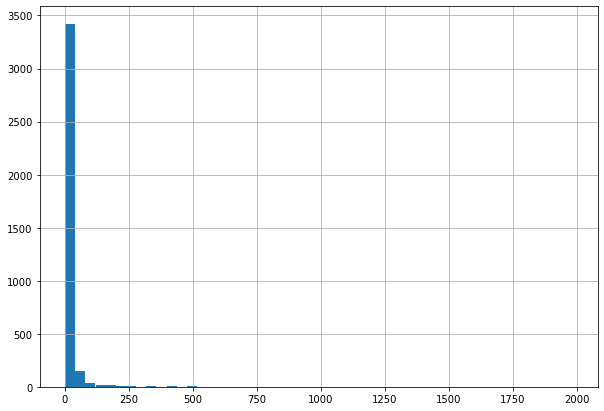

In [ ]:
df['WeaponLawViolations'].hist(bins=50)

In [ ]:
null_percentages = df.isnull().sum() / len(df) * 100
null_percentages

State                                   0.000000
AgencyType                              0.000000
AgencyName                              0.000000
Population                              0.000000
DrugNarcoticOffenses                    9.226361
DrugNarcoticViolations                  9.761223
DrugEquipmentViolations                32.187202
GamblingOffenses                       95.816619
BettingWagering                        98.567335
OperatingPromotingAssistingGambling    97.478510
GamblingEquipmentViolations            98.510029
SportsTampering                        99.942693
PornographyObsceneMaterial             69.436485
ProstitutionOffenses                   86.150907
Prostitution                           88.787011
AssistingorPromotingProstitution       93.333333
WeaponLawViolations                    29.531996
dtype: float64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
null_percentages = df.isnull().sum() / len(df) * 100
null_percentages

State                                  0.0
AgencyType                             0.0
AgencyName                             0.0
Population                             0.0
DrugNarcoticOffenses                   0.0
DrugNarcoticViolations                 0.0
DrugEquipmentViolations                0.0
GamblingOffenses                       0.0
BettingWagering                        0.0
OperatingPromotingAssistingGambling    0.0
GamblingEquipmentViolations            0.0
SportsTampering                        0.0
PornographyObsceneMaterial             0.0
ProstitutionOffenses                   0.0
Prostitution                           0.0
AssistingorPromotingProstitution       0.0
WeaponLawViolations                    0.0
dtype: float64

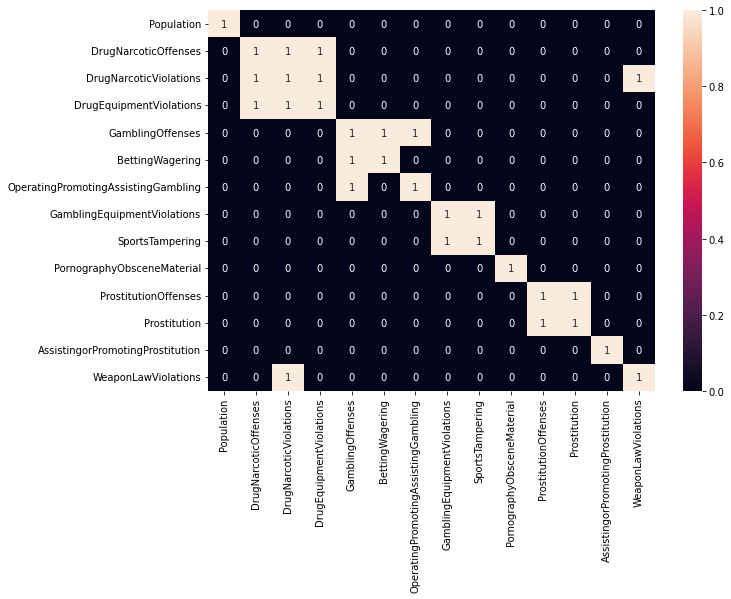

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cor_matrix = df.corr() #calculate the correlation matrix of the dataframe

plt.rcParams['figure.figsize'] = (10,7)
sns.heatmap(cor_matrix.abs()>0.8,annot=True) #heat map of correlation matrix
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['State']= label_encoder.fit_transform(df['State'])
df['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['AgencyType']= label_encoder.fit_transform(df['AgencyType'])
df['AgencyType'].unique()

array([0, 1, 6, 2, 3, 5, 4])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['AgencyName']= label_encoder.fit_transform(df['AgencyName'])
df['AgencyName'].unique()

array([1613,  106, 1308, ..., 3544, 2544, 3219])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

> # **8. Data Modelling**

> ### **Modelling methods**

In [ ]:
def score_generator(model, name='not-specified', type='train', std=False):
    x_trains=x_train
    x_tests=x_test
    if(std==True):
        scaler = StandardScaler()
        X_std = scaler.fit_transform(x_train)
        X_std_test = scaler.fit_transform(x_test)
        x_trains=X_std
        x_tests=X_std_test
    if (type == 'train'):
        y_pred = model.predict(x_trains)
        y_true = y_train
    elif (type == 'test'):
        y_pred = model.predict(x_tests)
        y_true = y_test
    

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    metrics_dict = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R-squared (R2)': r2
    }

    return metrics_dict


# Linear Model

In [ ]:
param_grid = {
    "fit_intercept": [True, False],
}

regressor = LinearRegression()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    regressor, param_grid=param_grid, cv=5, scoring=scoring
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'fit_intercept': True}
Best score: 3864684.7791024074


In [ ]:
score_generator(grid_search.best_estimator_, 'Linear Regressor', 'train')

{'Mean Absolute Error (MAE)': 425.0036584453384,
 'Mean Squared Error (MSE)': 1614614.4943821419,
 'Root Mean Squared Error (RMSE)': 1270.6748185047745,
 'R-squared (R2)': 0.8926223170156363}

In [ ]:
score_generator(grid_search.best_estimator_, 'Linear Regressor', 'test')

{'Mean Absolute Error (MAE)': 394.594916007881,
 'Mean Squared Error (MSE)': 2362052.2242556973,
 'Root Mean Squared Error (RMSE)': 1536.8969465308003,
 'R-squared (R2)': 0.7900349371183578}

# Lasso Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the Lasso regression model
lasso = Lasso()

# Define the hyperparameters for grid search
param_grid = {
    "alpha": [0.1, 1, 10],
    "tol": [0.0001, 0.001, 0.01]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_std, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+08, tolerance: 6.362e+06
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.030e+06, tolerance: 6.421e+06
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

Best hyperparameters: {'alpha': 10, 'tol': 0.01}
Best score: 0.8051811835361835


In [ ]:
score_generator(grid_search.best_estimator_, 'Lasso', 'train', std=True)

{'Mean Absolute Error (MAE)': 411.06278441813356,
 'Mean Squared Error (MSE)': 1692777.1093647236,
 'Root Mean Squared Error (RMSE)': 1301.0676805472972,
 'R-squared (R2)': 0.8874242214194239}

In [ ]:
score_generator(grid_search.best_estimator_, 'Lasso', 'test', std=True)

{'Mean Absolute Error (MAE)': 408.2948314211231,
 'Mean Squared Error (MSE)': 1752371.6990653689,
 'Root Mean Squared Error (RMSE)': 1323.771770006208,
 'R-squared (R2)': 0.8442300173518771}

# Decision Tree Regressor

In [ ]:
param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

regressor = DecisionTreeRegressor()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    regressor, param_grid=param_grid, cv=5, scoring=scoring
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 4713706.241348198


In [ ]:
score_generator(grid_search.best_estimator_, 'Decision Tree', 'train')

{'Mean Absolute Error (MAE)': 364.5604861917656,
 'Mean Squared Error (MSE)': 1023726.4083266873,
 'Root Mean Squared Error (RMSE)': 1011.7936589674237,
 'R-squared (R2)': 0.9319185043126416}

In [ ]:
score_generator(grid_search.best_estimator_, 'Decision Tree', 'test')

{'Mean Absolute Error (MAE)': 425.98274990246586,
 'Mean Squared Error (MSE)': 5420882.521187987,
 'Root Mean Squared Error (RMSE)': 2328.2788753042423,
 'R-squared (R2)': 0.5181326103854941}

# Random Forest

In [ ]:
param_grid = {
    "n_estimators": [2,100],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

regressor = RandomForestRegressor()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    regressor, param_grid=param_grid, cv=5, scoring=scoring
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 3037642.367734476


In [ ]:
score_generator(grid_search.best_estimator_, 'Random Forest', 'train')

{'Mean Absolute Error (MAE)': 326.7786572144915,
 'Mean Squared Error (MSE)': 812872.1494044142,
 'Root Mean Squared Error (RMSE)': 901.5942265811235,
 'R-squared (R2)': 0.9459410724545947}

In [ ]:
score_generator(grid_search.best_estimator_, 'Random Forest', 'test')

{'Mean Absolute Error (MAE)': 323.28422505839313,
 'Mean Squared Error (MSE)': 1433637.6482989786,
 'Root Mean Squared Error (RMSE)': 1197.3460854318514,
 'R-squared (R2)': 0.8725625894789704}

# Gradient Boosting Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_estimators": [2,150],
    "max_depth": [5, 10],
    "learning_rate": [0.1, 0.01],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

regressor = GradientBoostingRegressor()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = RandomizedSearchCV(regressor, 
                                 param_distributions = param_grid, 
                                 n_iter=5, 
                                 cv=5,
                                 scoring=scoring)


grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.1}
Best score: 5646819.77292596


> ### **Models evaluation**

In [ ]:
score_generator(grid_search.best_estimator_, 'Gradient Boosting', 'train')

{'Mean Absolute Error (MAE)': 57.0212954474427,
 'Mean Squared Error (MSE)': 7668.666555264633,
 'Root Mean Squared Error (RMSE)': 87.57092300110027,
 'R-squared (R2)': 0.9994900060360234}

In [ ]:
score_generator(grid_search.best_estimator_, 'Gradient Boosting', 'test')

{'Mean Absolute Error (MAE)': 161.04601903488867,
 'Mean Squared Error (MSE)': 79551.68165228437,
 'Root Mean Squared Error (RMSE)': 282.04907667334135,
 'R-squared (R2)': 0.9929285755543675}

> # **9- Conclusion**
---

> # **10- Reference**
---